In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout 
from tensorflow.keras import Input 
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.utils import class_weight 

In [2]:
from google.colab import drive
drive.mount("/content/drive")
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os 
os.listdir("/content/drive/MyDrive")

['creditcard.csv', 'Colab Notebooks']

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/creditcard.csv") 

In [5]:
df = dataset.copy()

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.dtypes.value_counts()

,count
float64,30
int64,1


In [8]:
df.isna().sum()/df.shape[0]

,0
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


<Axes: title={'center': 'Correlations between our variables'}>

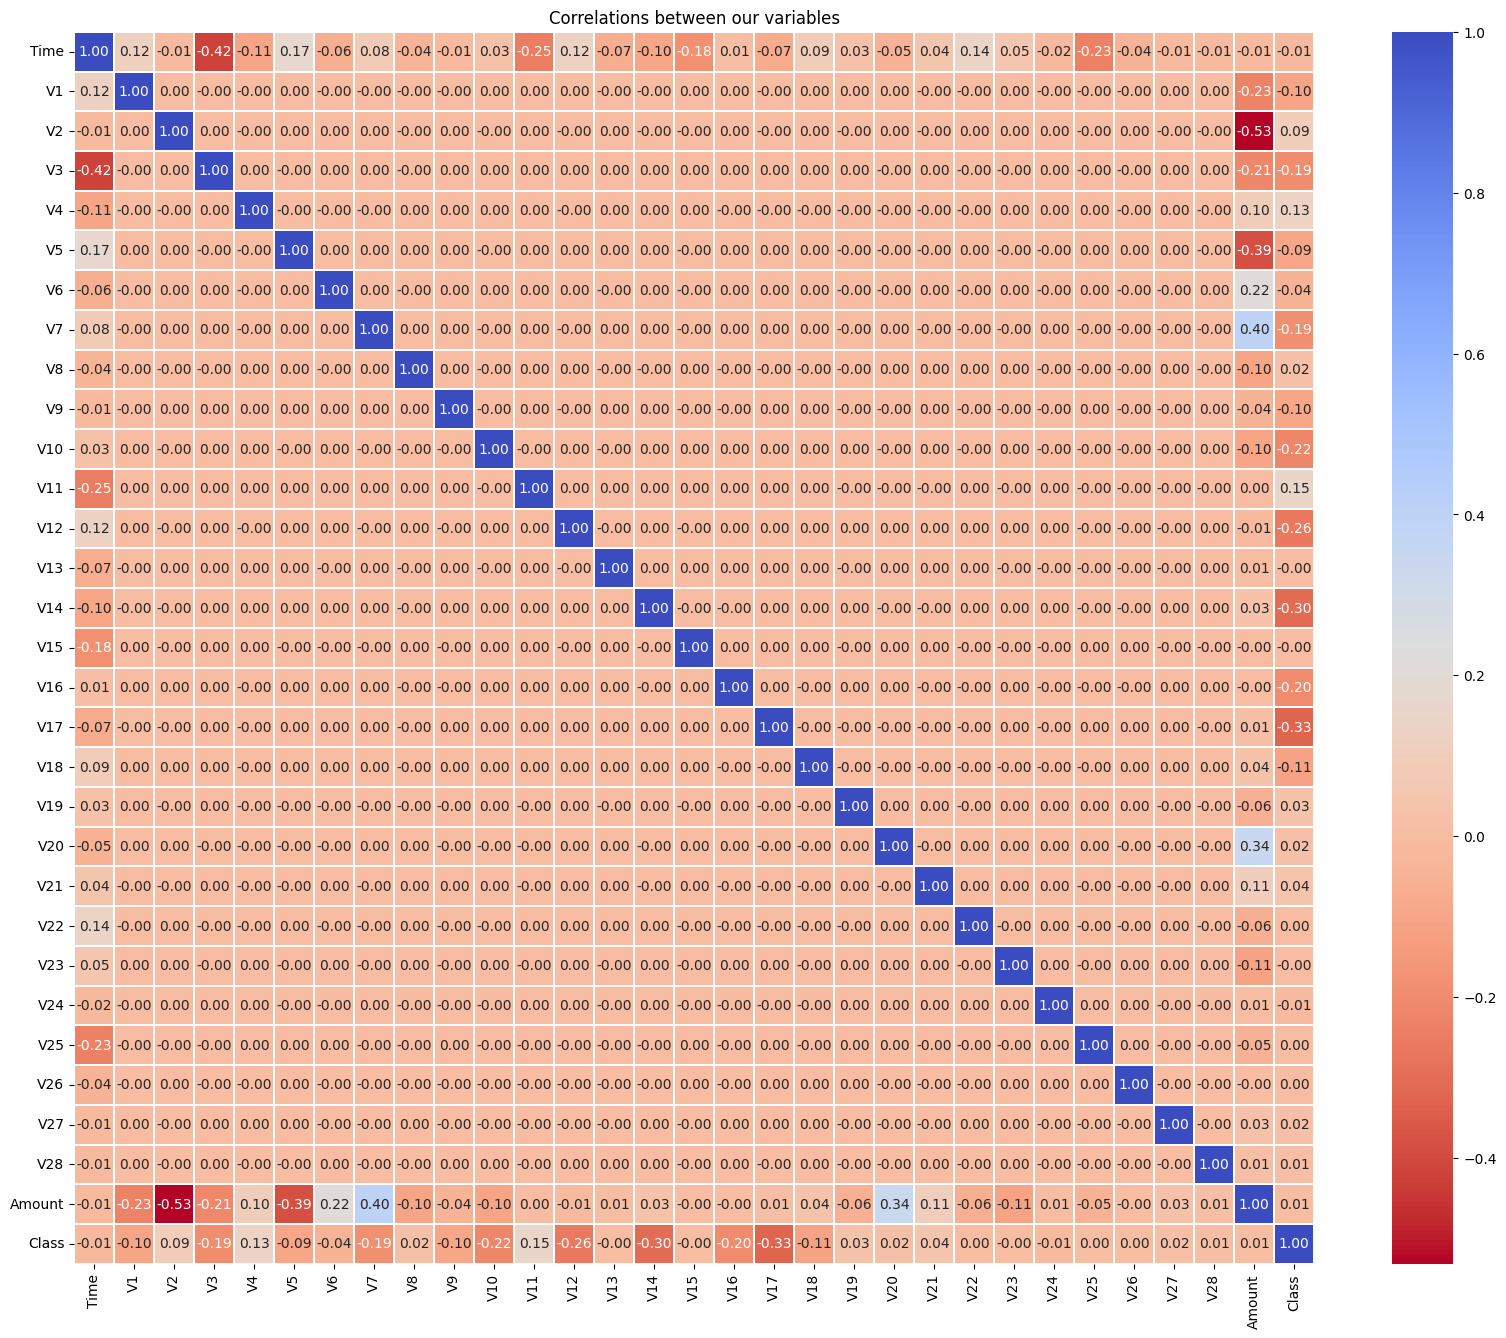

In [9]:
plt.figure(figsize=(20,16))
plt.title("Correlations between our variables")
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm_r",linewidths=0.2)

In [10]:
X = df.drop("Class",axis=1)
y = df["Class"] 
y.value_counts()

,count
Class,
0,284315
1,492


<Axes: xlabel='Class', ylabel='count'>

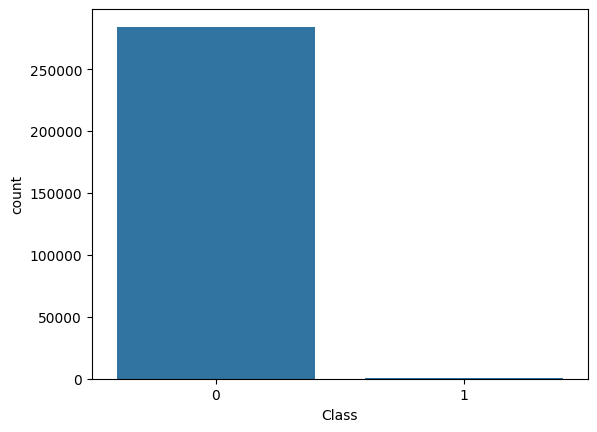

In [11]:
sns.countplot(x="Class",data = df)

<Axes: ylabel='Class'>

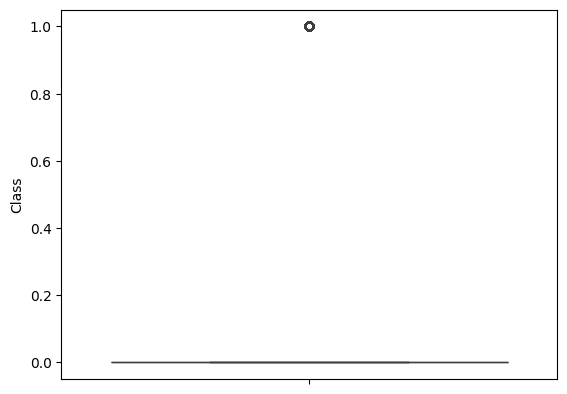

In [12]:
sns.boxplot(y)

In [13]:
corre = X.join(y).corr()["Class"].drop("Class")
corre.sort_values(ascending=True)

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


Text(0.5, 1.0, 'Most Useful variables ranking')

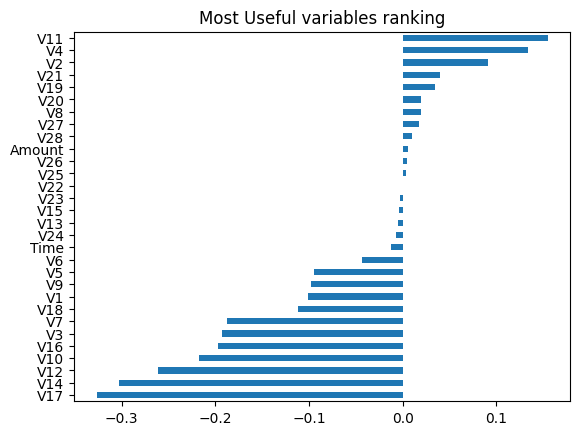

In [14]:
corre.sort_values().plot(kind='barh')
plt.title("Most Useful variables ranking")

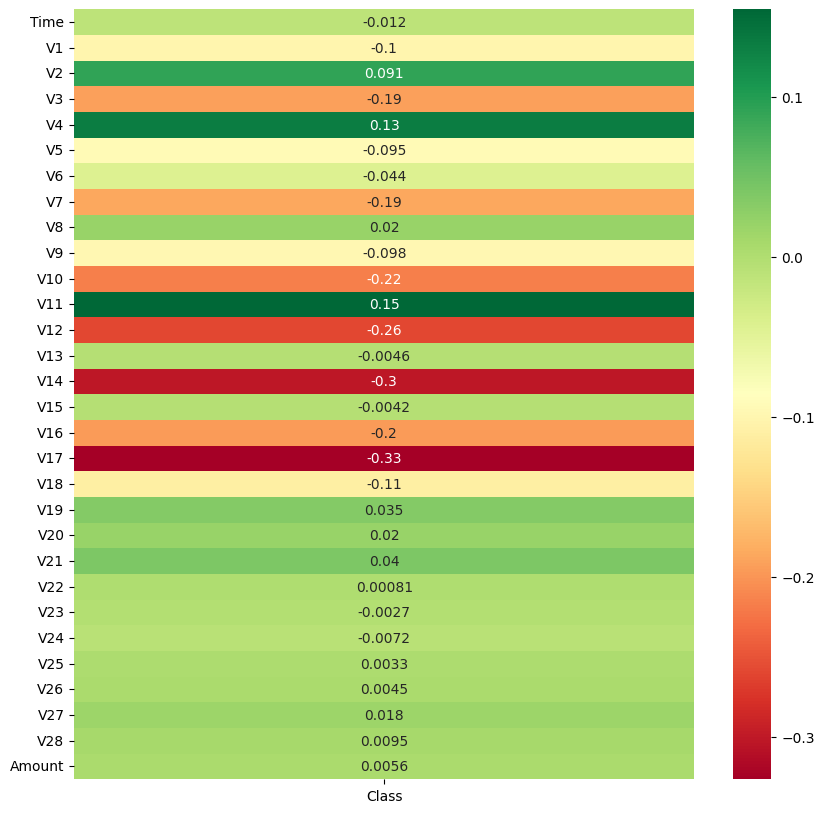

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corre.to_frame(), annot=True, cmap='RdYlGn', cbar=True)

plt.show()

In [16]:

# 2. Classer par valeur absolue (la force brute, peu importe le signe)
importance_classement = corre.abs().sort_values(ascending=False)

print("Classement des Variables les plus influentes sur y :")

print()

print((importance_classement))

Classement des Variables les plus influentes sur y :

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


In [17]:
X_n = X.drop(columns=["V22","V23"])

In [18]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [19]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

In [20]:
laveur = make_pipeline(StandardScaler())
laveur

Pipeline(steps=[('standardscaler', StandardScaler())])

In [21]:
X_train_lavé = laveur.fit_transform(X_train,y_train)
X_train_lavé 

array([[ 1.20281594,  0.10299381,  0.49260505, ...,  0.28263205,
         0.42092822,  0.02425356],
       [-0.88803516,  0.62167117, -0.12508285, ...,  0.03571683,
         0.08282871, -0.16112191],
       [ 0.77142899,  0.92824497, -0.70570788, ...,  0.08542019,
        -0.11972116,  0.13593127],
       ...,
       [ 1.12735798, -0.13848648,  0.6573242 , ...,  0.66728292,
         0.94797039, -0.33955224],
       [ 1.39596893, -0.44422136,  0.40871771, ..., -0.32713249,
         0.00271982, -0.33963162],
       [ 1.14838172,  1.05434509,  0.11344842, ..., -0.14772729,
        -0.08550846, -0.34236998]])

In [22]:
X_test_lavé = laveur.transform(X_test)

In [31]:
print(X_train_lavé.shape)

(227845, 30)


## Neural Network building

In [23]:
#Handle Imbalance
weights = class_weight.compute_class_weight(class_weight="balanced",
                                            classes = np.unique(y_train),
                                            y=y_train)

class_weights = dict(enumerate(weights))


#Model
neural_network = Sequential([
    Input(shape=(X_train_lavé.shape[1],)),
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(32,activation="relu"),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])

#Compilation 
neural_network.compile(optimizer="adam",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy",
                                  tf.keras.metrics.Precision(),
                                  tf.keras.metrics.Recall(),
                                  tf.keras.metrics.AUC()
                                  ]) 

#Stop Overfitting 
stop_overfitting = EarlyStopping(
    monitor = "val_loss",
    patience = 3,
    restore_best_weights = True
)

#Neural_Network_Training 
neural_network.fit(X_train_lavé,y_train,
                   validation_split = 0.2,
                   epochs = 40,
                   batch_size = 250,
                   class_weight=class_weights,
                   callbacks = [stop_overfitting])

Epoch 1/40
730/730 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9501 - auc: 0.8135 - loss: 0.6137 - precision: 0.0325 - recall: 0.6753 - val_accuracy: 0.9627 - val_auc: 0.9650 - val_loss: 0.1514 - val_precision: 0.0391 - val_recall: 0.9079
Epoch 2/40
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9461 - auc: 0.9623 - loss: 0.2178 - precision: 0.0278 - recall: 0.8982 - val_accuracy: 0.9703 - val_auc: 0.9778 - val_loss: 0.0966 - val_precision: 0.0487 - val_recall: 0.9079
Epoch 3/40
730/730 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9644 - auc: 0.9747 - loss: 0.1660 - precision: 0.0415 - recall: 0.9166 - val_accuracy: 0.9648 - val_auc: 0.9786 - val_loss: 0.1130 - val_precision: 0.0420 - val_recall: 0.9211
Epoch 4/40
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9532 - auc: 0.9835 - loss: 0.1504 - precision: 0.0383 - recall: 0.9442 - val_accuracy: 0.9863 - val_auc: 0.9839 - val_loss: 0.0554 - val_precision: 0.1003 - val_recall: 0.9079
Epoch 5/40
730/730 ━━━━━━━━━━━━━

In [ ]:
neural_network.evaluate(X_test_lavé,y_test) #Ce code renvoie le loss ajouté dans le compile 
#"loss = "binary_crossentropy"

#Loss
#Accuracy
#Precision
#Recall
#AUC 

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - auc: 0.9701 - loss: 0.0545 - precision: 0.0798 - recall: 0.8708


[0.056038856506347656,
 0.9850426316261292,
 0.0972222238779068,
 0.9285714030265808,
 0.9842063188552856]

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

predictions = neural_network.predict(X_test_lavé)
y_pred = (predictions>0.5)

print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print()
print("classification_report")
print(classification_report(y_test,y_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
confusion_matrix
[[56019   845]
 [    7    91]]

classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.93      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [26]:
from sklearn.metrics import precision_recall_curve

probs = neural_network.predict(X_test_lavé).ravel()
p, r, t = precision_recall_curve(y_test, probs)

print(p)
print(r)
print(t)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[0.00172045 0.00172048 0.00172051 ... 0.87037037 0.86792453 1.        ]
[1.         1.         1.         ... 0.47959184 0.46938776 0.        ]
[1.08737067e-16 1.04416445e-14 3.06987881e-14 ... 9.99999881e-01
 9.99999940e-01 1.00000000e+00]


## Nouvelles Prédictions


In [32]:
import numpy as np
import pandas as pd

# ---- Generate synthetic new data ----
# Number of new transactions
n_samples = 10

# Create random values with same feature size
# (Assumes X_train_lavé already scaled and transformed)
new_data = np.random.normal(
    loc=0,
    scale=1,
    size=(n_samples, X_train_lavé.shape[1])
)

new_df = pd.DataFrame(new_data)

# ---- Predict probabilities ----
probs = neural_network.predict(new_df)

# ---- Convert to class labels ----
threshold = 0.5
preds = (probs > threshold).astype(int)


results = pd.DataFrame({
    "Fraud_Probability": probs.flatten(),
    "Class": preds.flatten()
})

print("new_data_prediction")
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
new_data_prediction


,Fraud_Probability,Class
0,0.469575,0
1,0.005413,0
2,0.000003,0
3,0.000004,0
4,0.240864,0
5,0.006557,0
6,0.005919,0
7,0.012030,0
8,0.001036,0
9,0.000073,0


## Visual Overview of our Neural Network 

In [28]:
neural_network.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,013 (168.02 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,676 (112.02 KB)

In [29]:
!pip install pydot graphviz


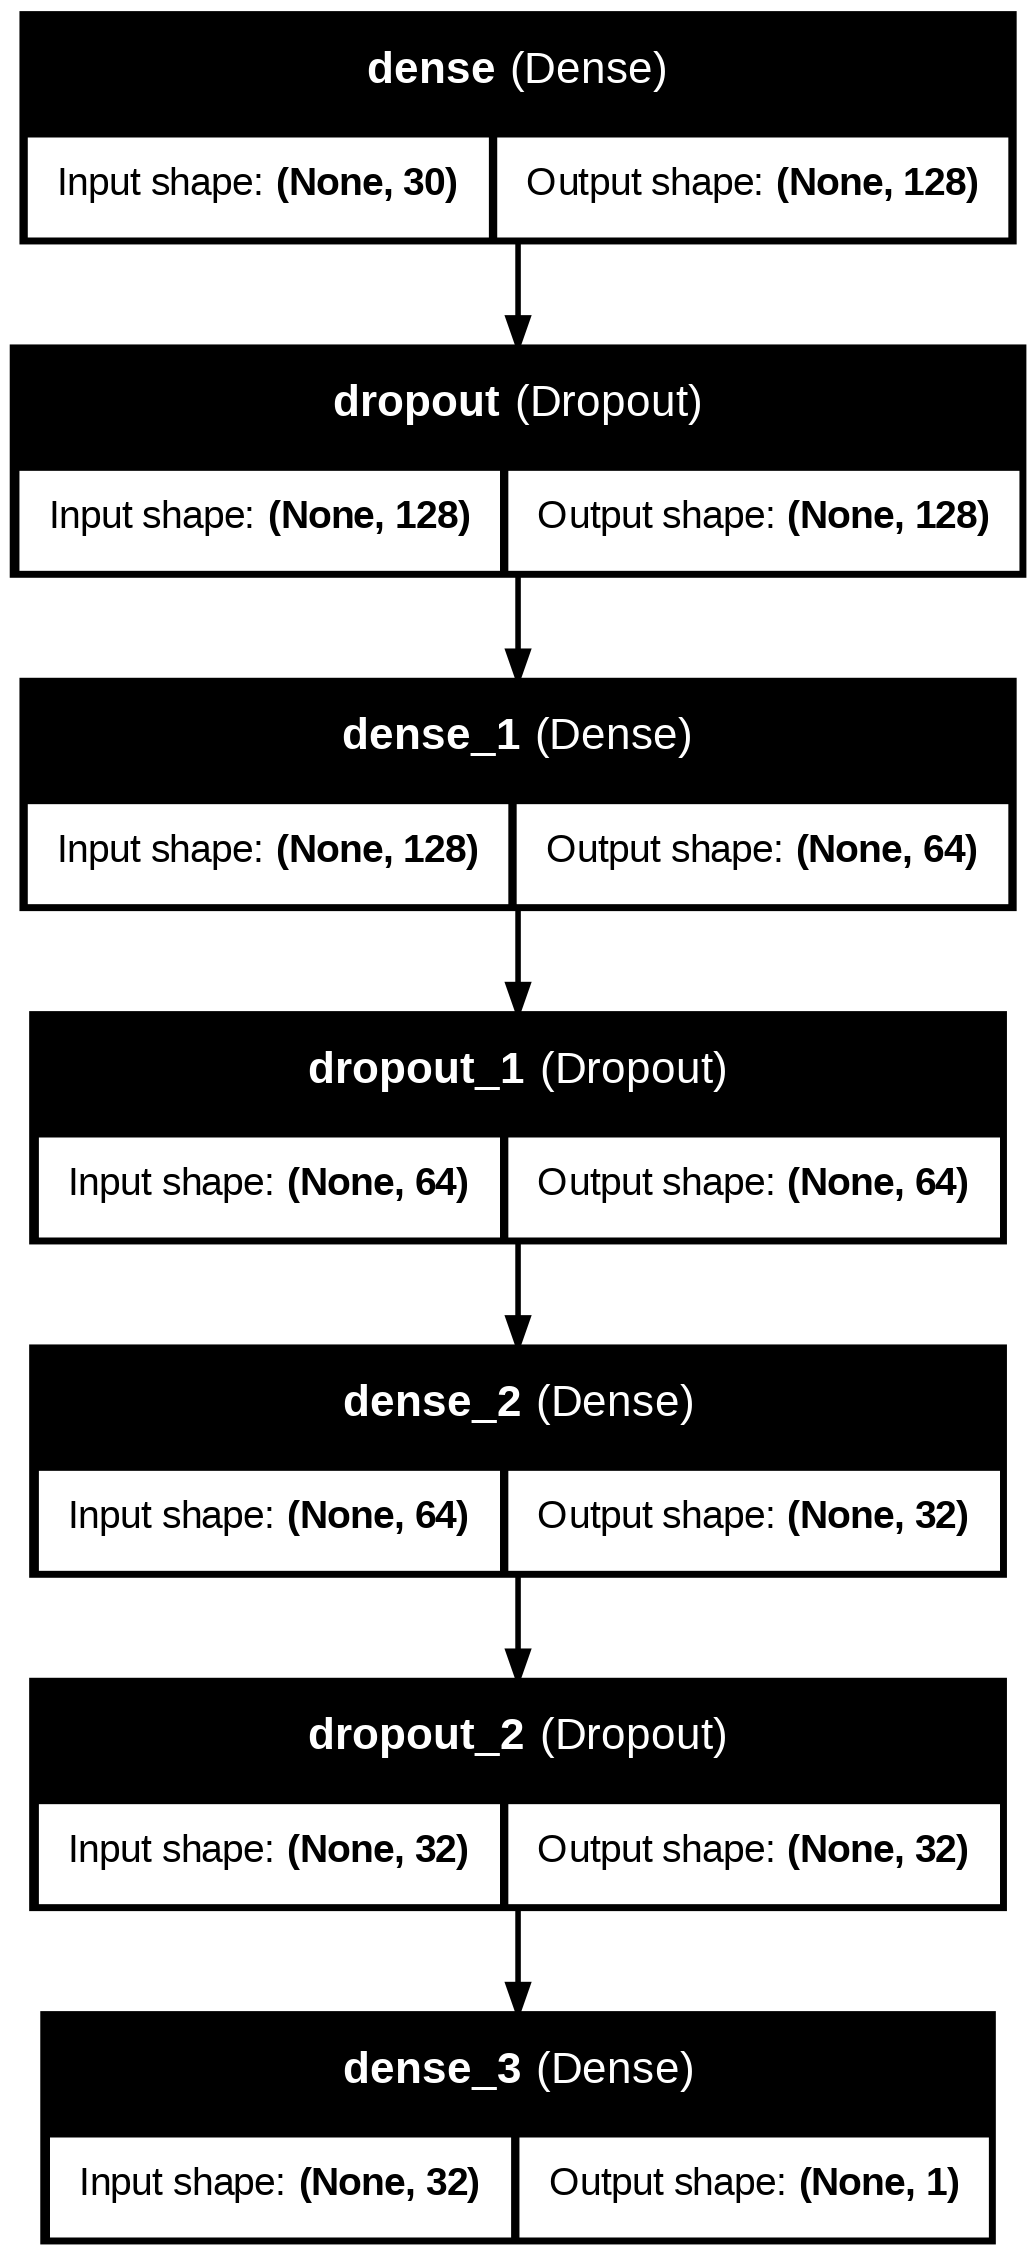

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(
    neural_network,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True
)
